In [1]:
import pandas as pd

file_name = 'data/seoul_covid_10_31_.csv'


In [2]:
data = pd.read_csv(file_name, encoding='utf-8')
print(data.shape)


(6056, 7)


In [3]:
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


In [4]:
# 연번 순서대로 값을 내림차순
data = data.sort_values(by='연번', ascending=False)
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


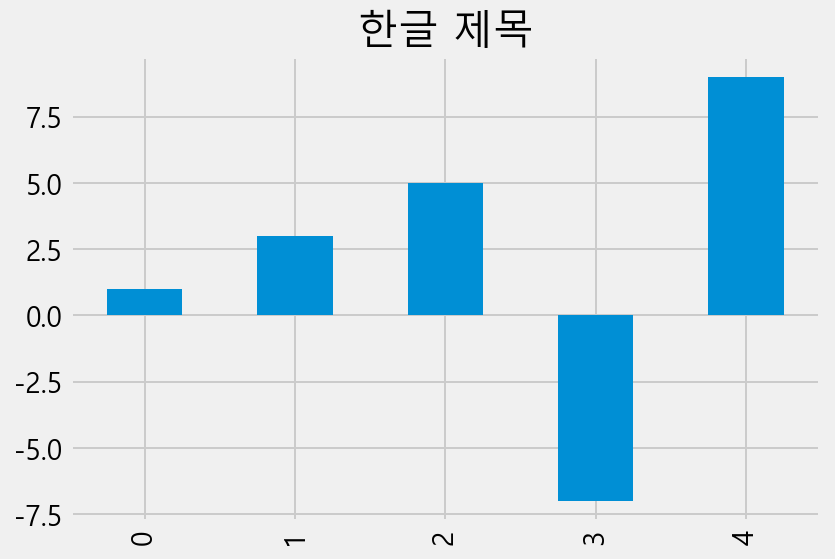

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family='Malgun Gothic')
# 축(axis)의 레이블의 값에 마이너스가 있는 경우에 아래와 같은 설정 필요
plt.rc('axes', unicode_minus=False)

# 그래프 style 설정 - ggplot, fivethirtyeight, dark_background
plt.style.use('fivethirtyeight')

# 간단한 bar plot 그리기
pd.Series([1,3,5,-7,9]).plot.bar(title='한글 제목')

# 시각화 할때 폰트가 좀 더 선명하게 보이도록 하는 설정
# retina 디스플레이가 지원되는 환경에서만 가능
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

### 1. 확진일 

* 확진일 컬럼의 타입 object를 datetime 타입으로 변경하기 to_datetime() 함수 사용
* 확진일자 컬럼의 값에서 dt.month 와 dt.week 를 사용해서 월과 주 컬럼을 추가
* 확진일자 별로 시각화

In [8]:
data['확진일'].value_counts().head()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
Name: 확진일, dtype: int64

In [10]:
# 확진일 컬럼의 타입 확인
print(data['확진일'].dtypes)
# pandas의 to_datetime() 함수를 사용해서 날짜타입으로 변경하기
# 새로운 확진일자 컬럼을 추가하기
data['확진일자'] = pd.to_datetime('2020-'+data['확진일'].str.replace('.', '-'))
print(data['확진일자'].dtypes)

object
datetime64[ns]


In [12]:
data[['확진일', '확진일자']].head()

,확진일,확진일자
0,10.31.,2020-10-31
1,10.31.,2020-10-31
2,10.31.,2020-10-31
3,10.31.,2020-10-31
4,10.31.,2020-10-31


In [14]:
# 확진일자 컬럼에서 월 만 추출하고, 월 컬럼을 추가하기 
data['월'] = data['확진일자'].dt.month
data[['확진일', '확진일자', '월']].head()

,확진일,확진일자,월
0,10.31.,2020-10-31,10
1,10.31.,2020-10-31,10
2,10.31.,2020-10-31,10
3,10.31.,2020-10-31,10
4,10.31.,2020-10-31,10


In [15]:
# 해당 연도에서 몇번째 '주' 인지 추출
data['주'] = data['확진일자'].dt.week
data[['확진일', '확진일자', '주']].head()

,확진일,확진일자,주
0,10.31.,2020-10-31,44
1,10.31.,2020-10-31,44
2,10.31.,2020-10-31,44
3,10.31.,2020-10-31,44
4,10.31.,2020-10-31,44


In [18]:
# 확진일자로 line plt (선그래프) 그리기
data['확진일자'].value_counts().sort_index()

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-10-27    31
2020-10-28    31
2020-10-29    52
2020-10-30    46
2020-10-31    45
Name: 확진일자, Length: 253, dtype: int64

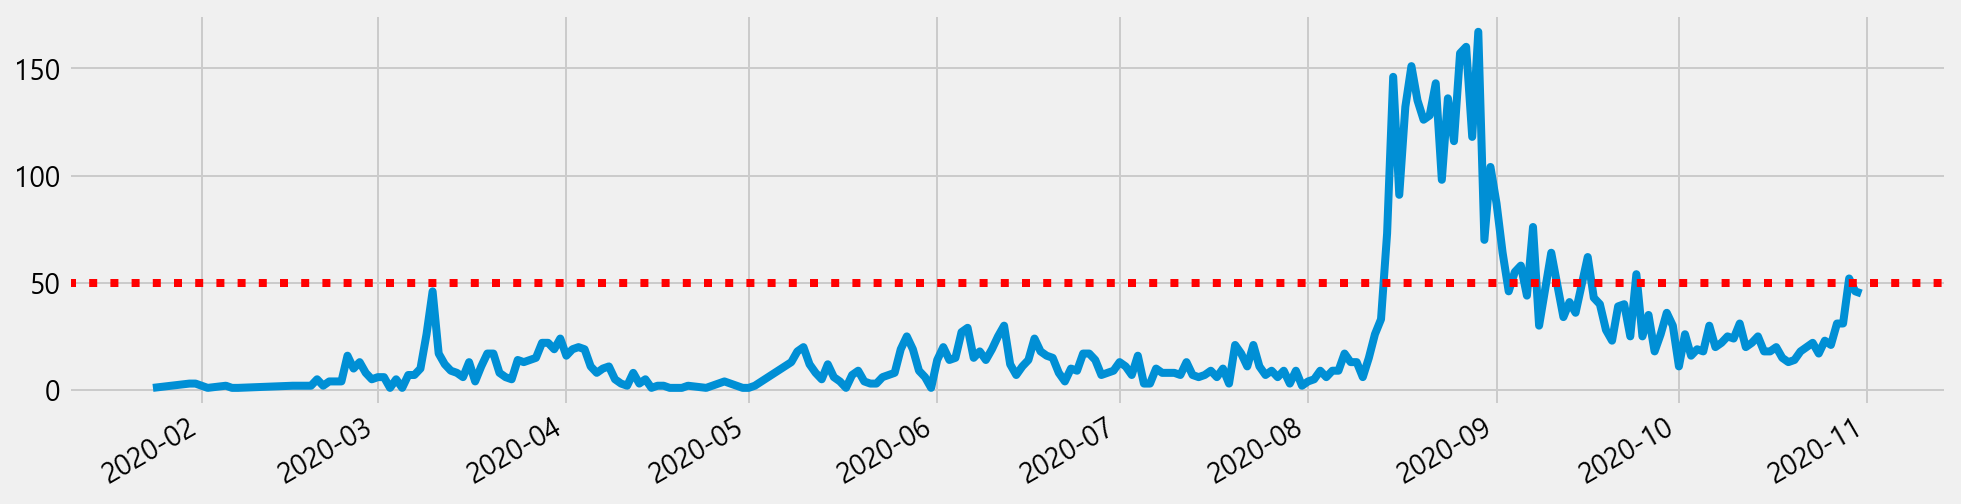

In [21]:
data['확진일자'].value_counts().sort_index().plot(figsize=(15,4))
#수평선 표시하기
plt.axhline(50, color='red', linestyle=':')

### 1.1 선그래프에 값을 표시하기

In [23]:
data['확진일자'].head(2)

0   2020-10-31
1   2020-10-31
Name: 확진일자, dtype: datetime64[ns]

In [24]:
'2020-10-31'[-5:]

'10-31'

In [27]:
# series 객체를 str 타입으로 변경하고, map() 인자에 lambda 식을 인자로 전달

data['월일'] = data['확진일자'].astype(str).map(lambda x : x[-5:])
data[['확진일자', '월일']].head()

,확진일자,월일
0,2020-10-31,10-31
1,2020-10-31,10-31
2,2020-10-31,10-31
3,2020-10-31,10-31
4,2020-10-31,10-31


In [33]:
day_count = data['월일'].value_counts().sort_index()
print(len(day_count))
day_count.head()

253


01-24    1
01-30    3
01-31    3
02-02    1
02-05    2
Name: 월일, dtype: int64

In [34]:
day_count.iloc[2]

3

In [35]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 30:
        print(i, case_count)

28 46
173 33
174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
194 46
195 55
196 58
197 44
198 76
200 47
201 64
202 49
203 34
204 41
205 36
206 49
207 62
208 43
209 40
212 39
213 40
215 54
217 35
220 36
232 31
248 31
249 31
250 52
251 46
252 45


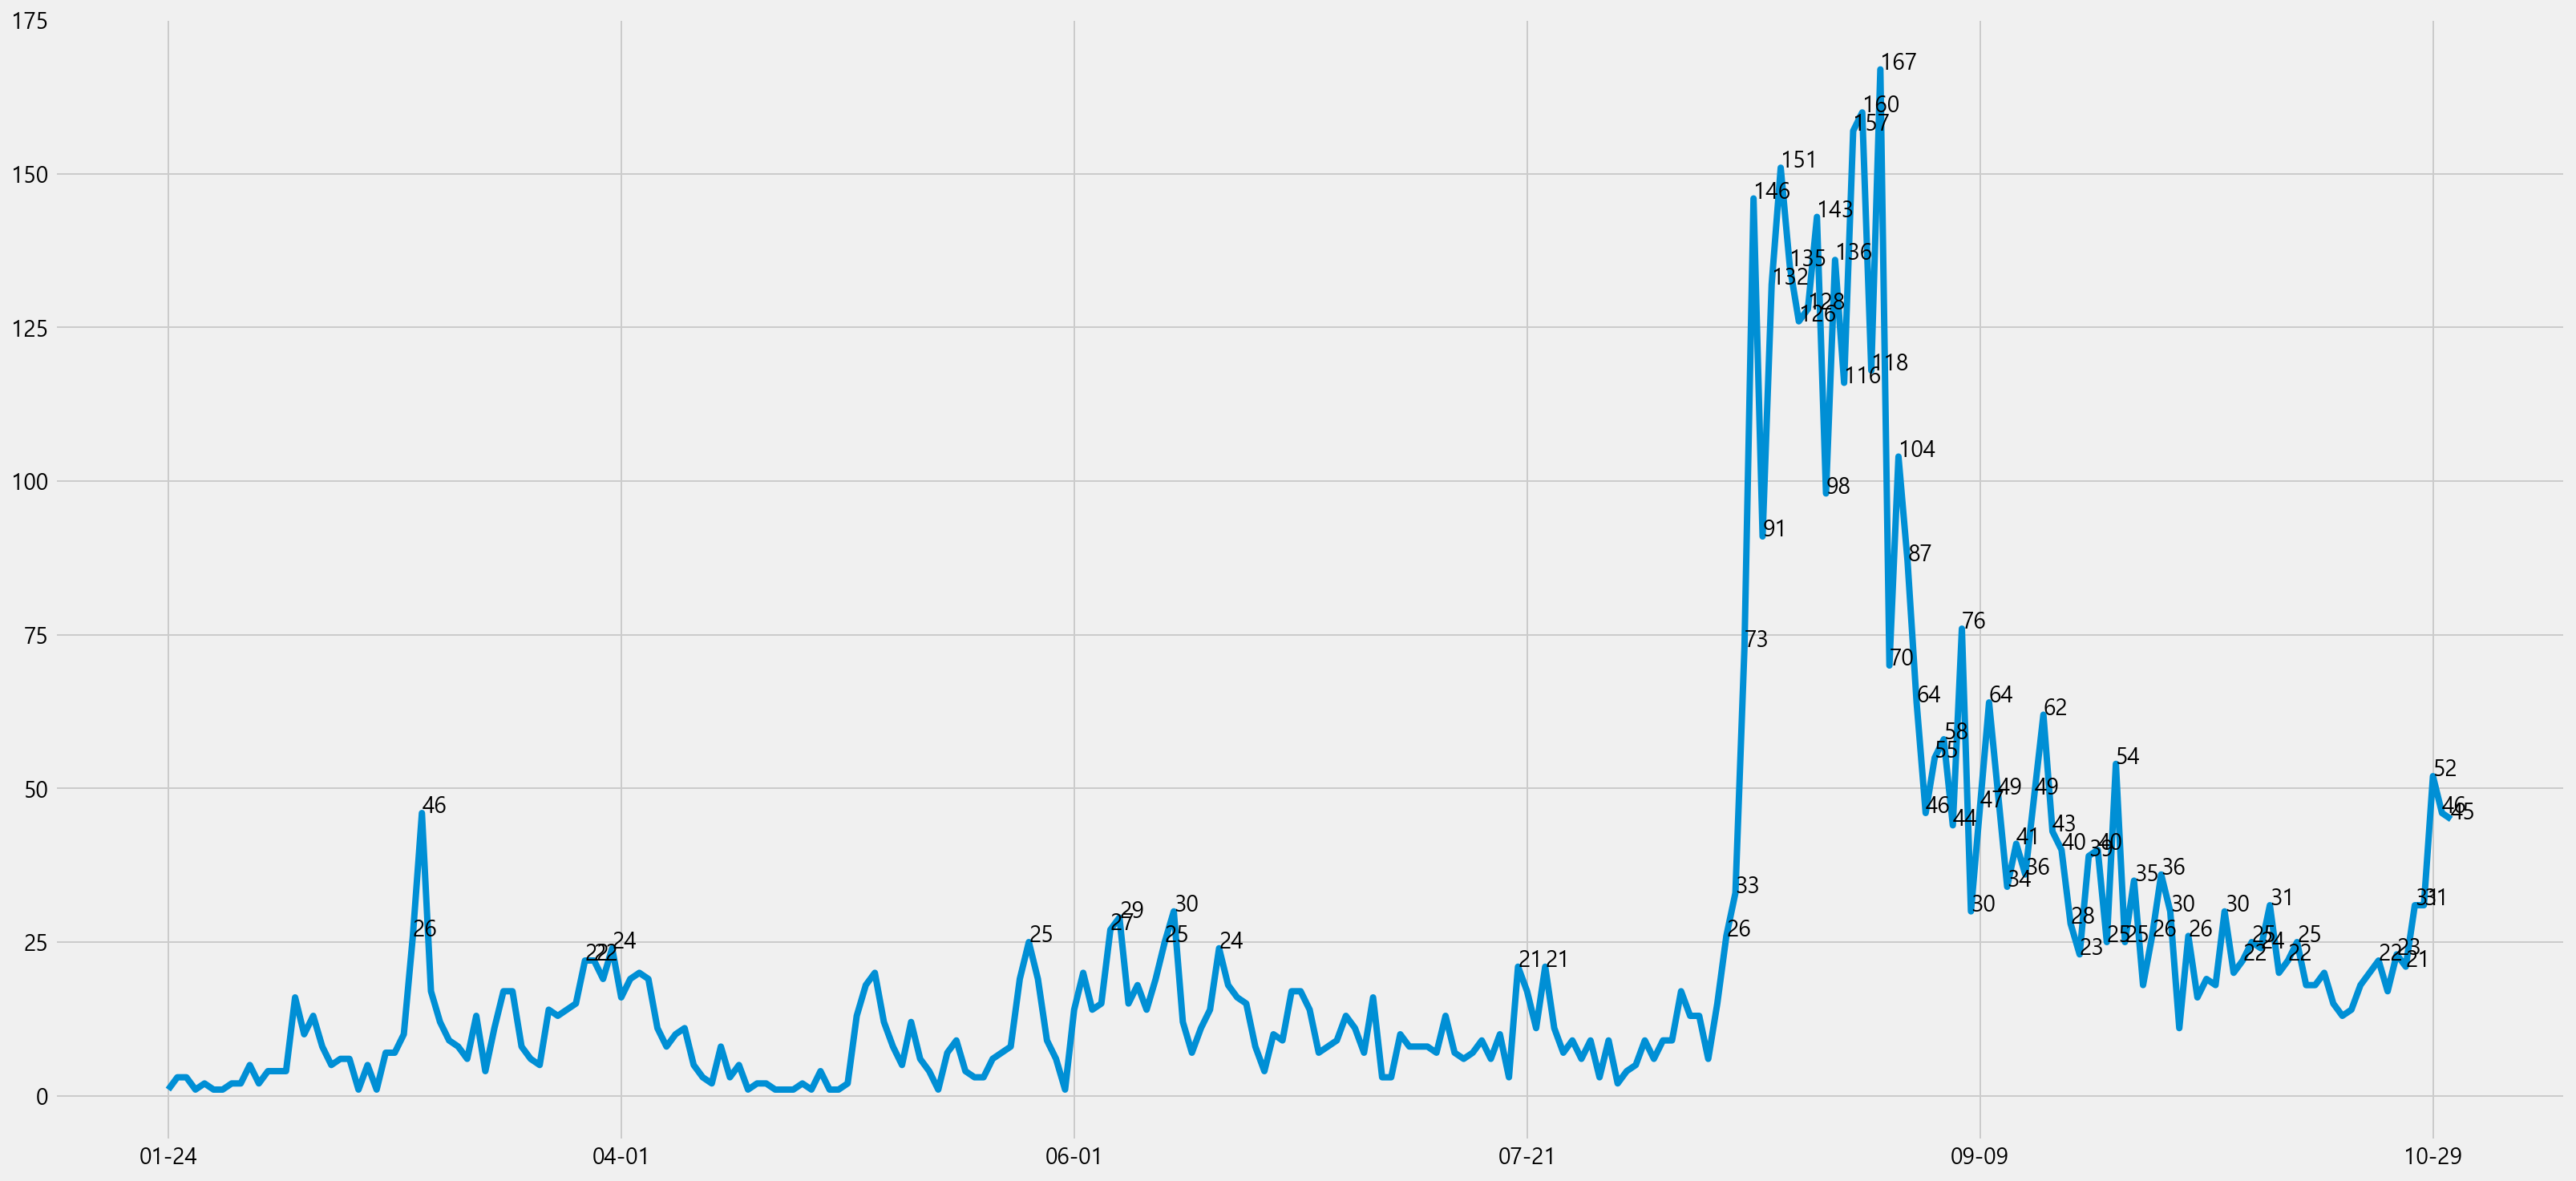

In [41]:
# 30보다 큰 경우에만 text 출력
plot = day_count.plot(figsize=(25, 12))

for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        plot.text(x=i, y=case_count, s=case_count)

### 1.2 확진자가 가장 많이 나온 날

In [46]:
day_count.head()

01-24    1
01-30    3
01-31    3
02-02    1
02-05    2
Name: 월일, dtype: int64

In [42]:
day_count.describe()

count    253.000000
mean      23.936759
std       32.280700
min        1.000000
25%        6.000000
50%       14.000000
75%       25.000000
max      167.000000
Name: 월일, dtype: float64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

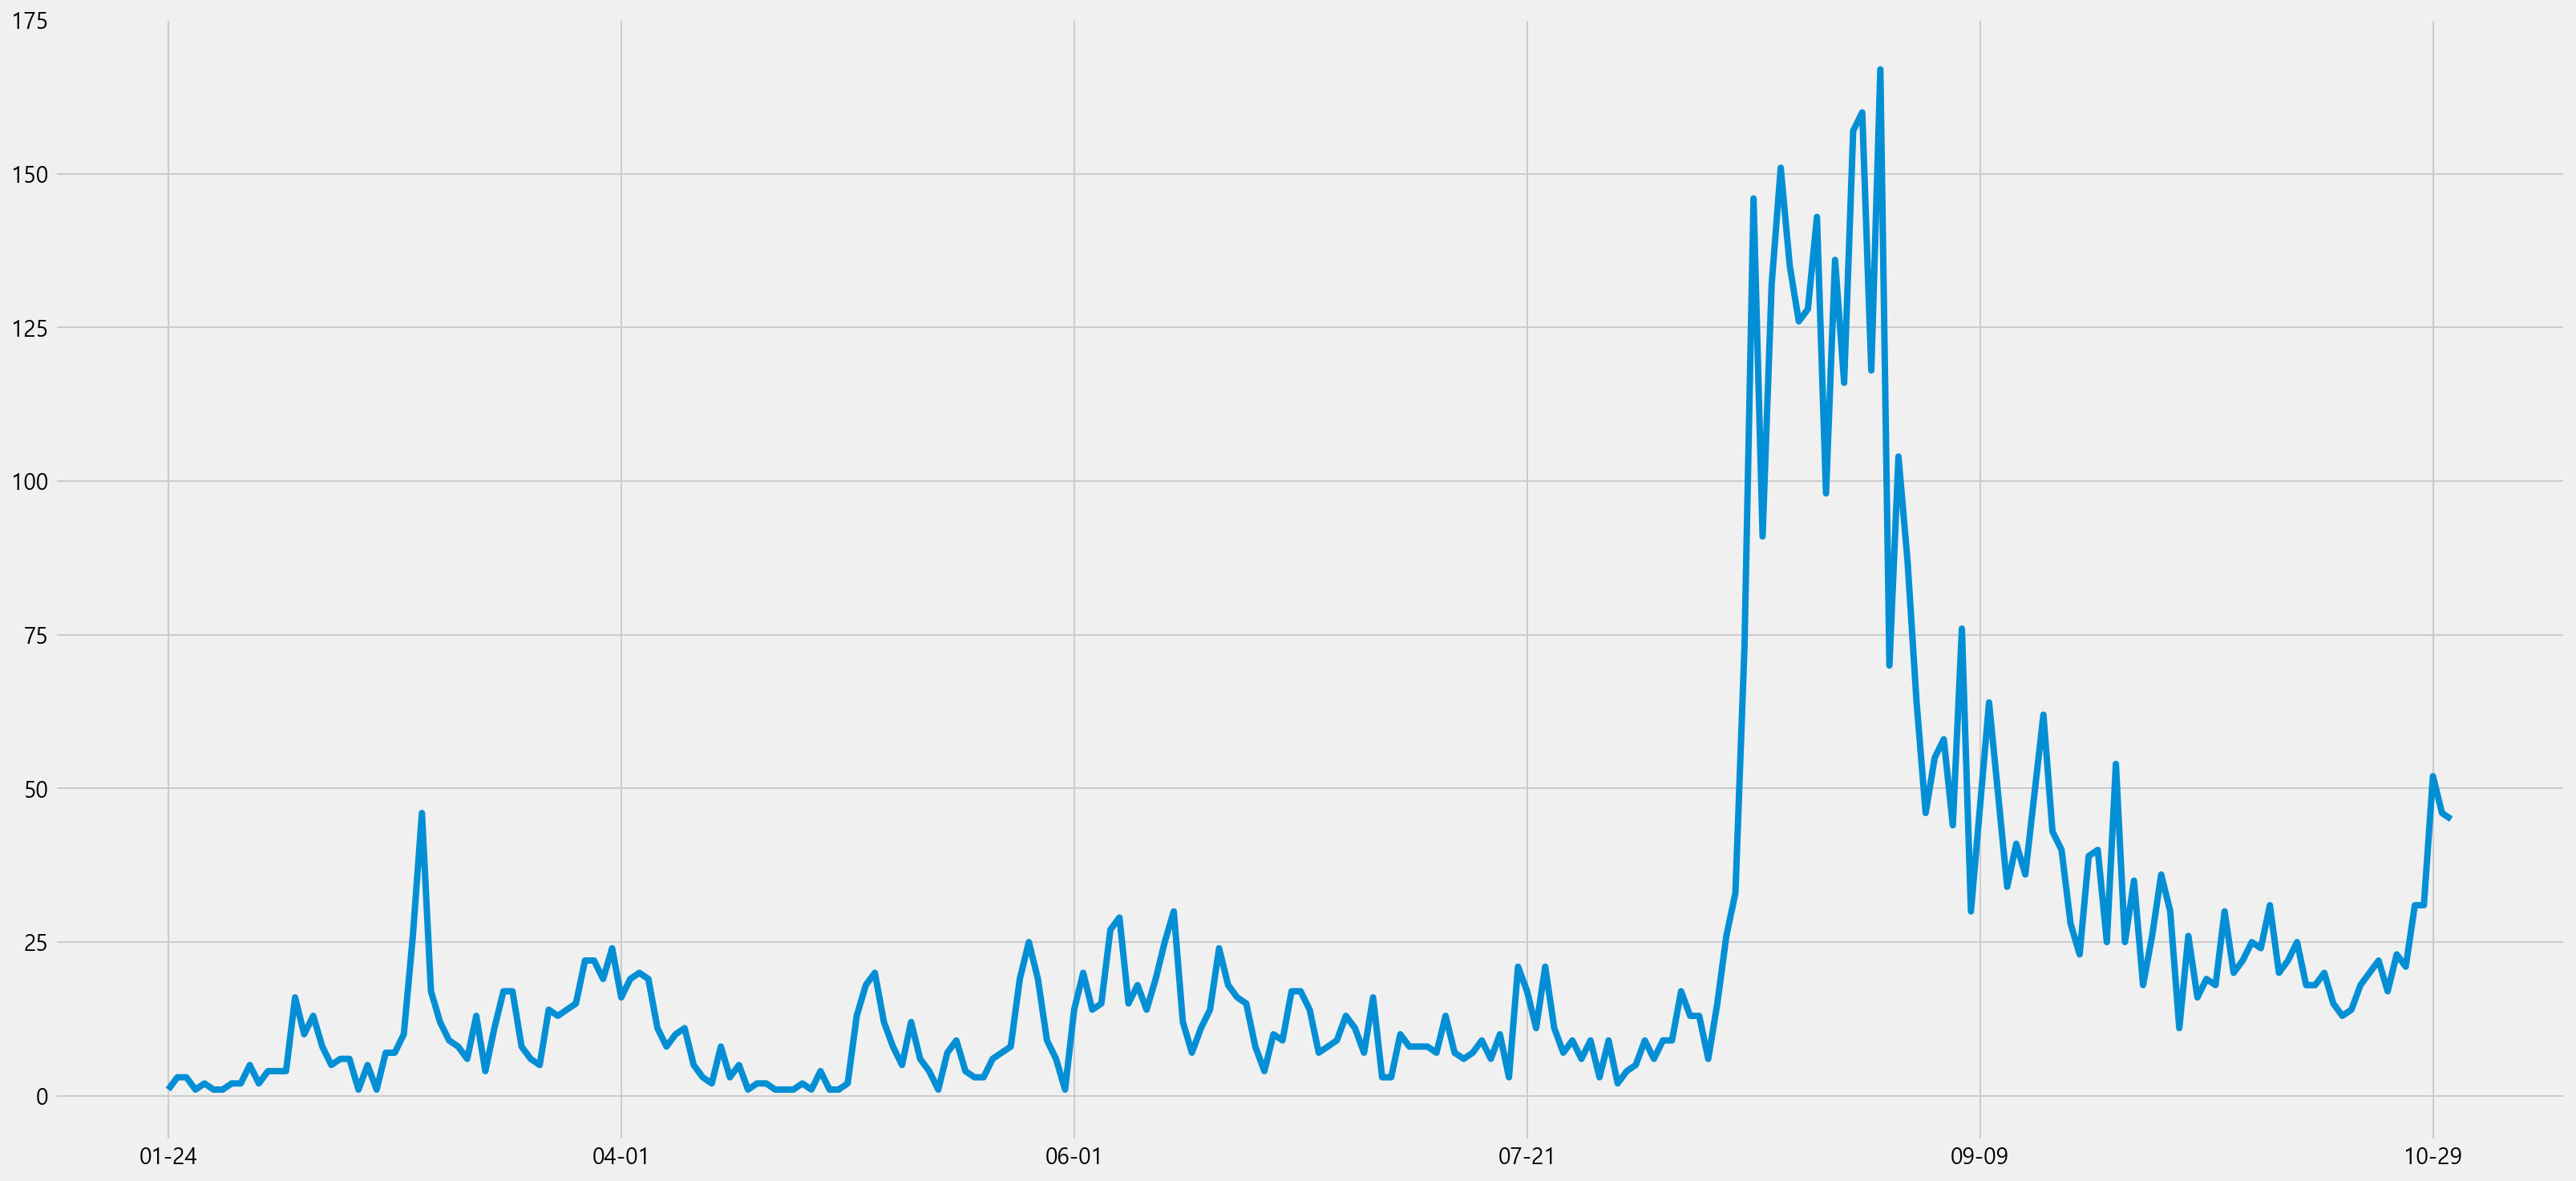

In [45]:
# 확진자가 가장 많았던 날을 찾기
day_count[day_count == day_count.max()]

plot = day_count.plot(figsize=(25, 12))

for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        plot.text(x=i, y=case_count, s=case_count)

In [48]:
# 확진자가 가장 많았던 날의 발생이력을 찾기
data.loc[data['월일'] == '08-29'].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
2143,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2178,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
2205,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
2206,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
2207,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 1.3 line plot(선그래프)를 bar plot 으로 그리기

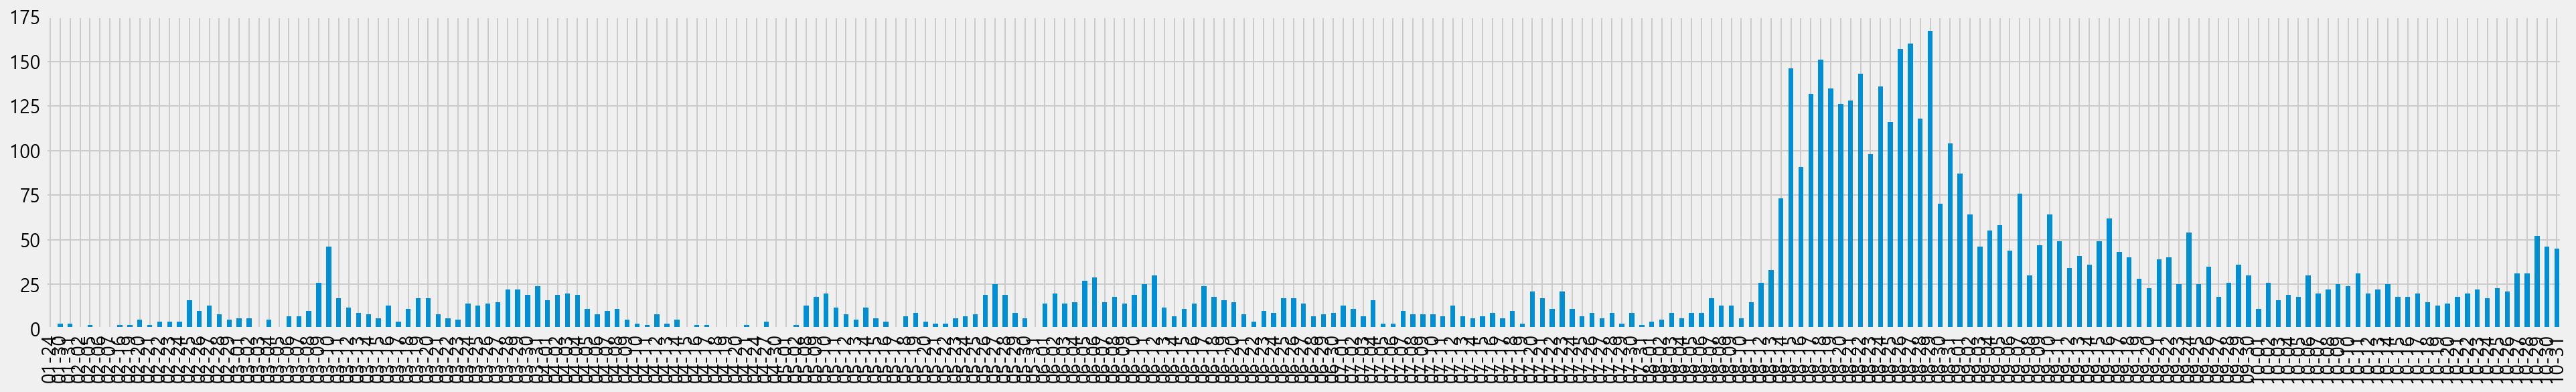

In [49]:
#day_count.plot.bar(figsize=(30, 4))

중간값 :  25.0 14.0


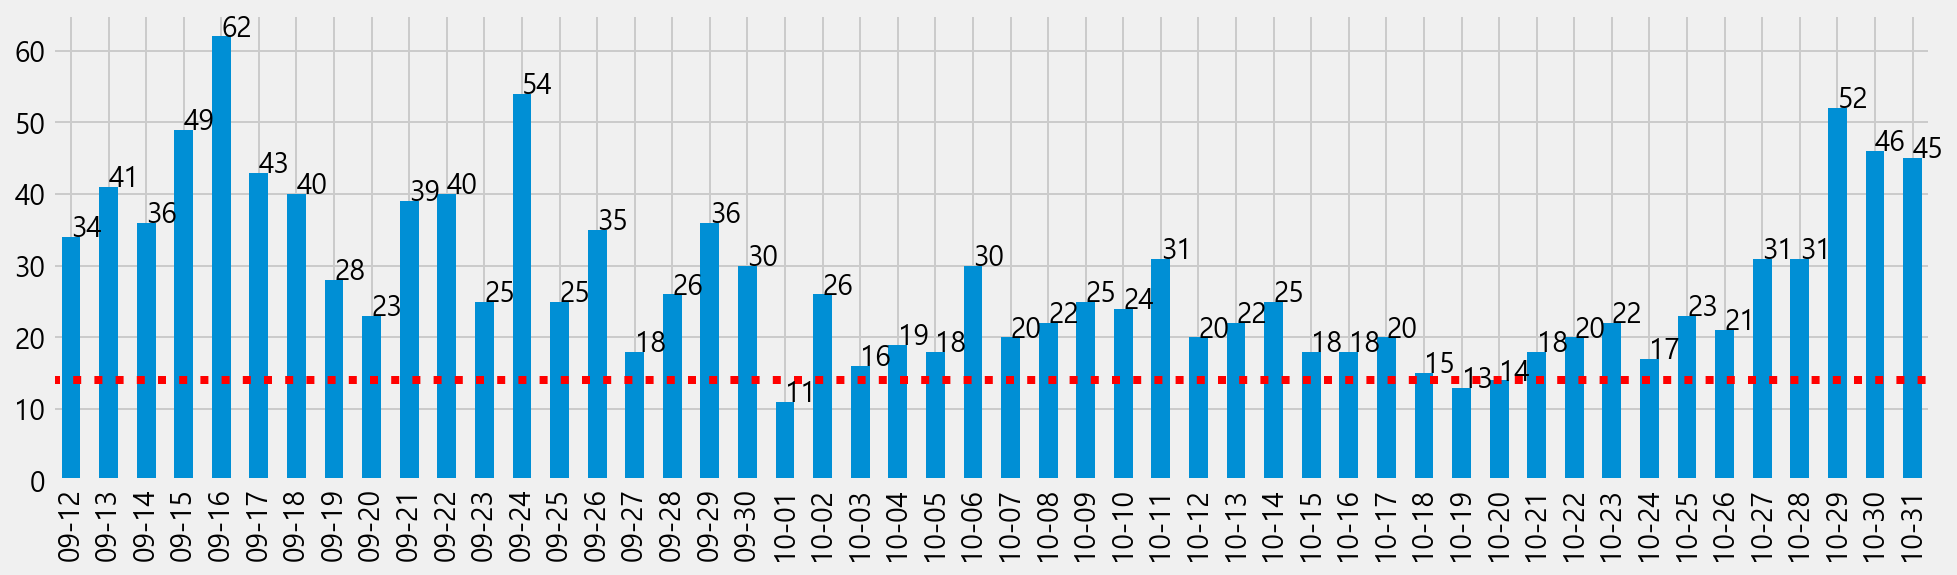

In [55]:
# 중간값
print('중간값 : ', day_count[-50:].median(), day_count.median())
# 슬라이싱으로 최신 데이터만 그려보기
bar_plot = day_count[-50:].plot.bar(figsize=(15,4))
bar_plot.axhline(day_count.median(), linestyle=':', color='red')

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        bar_plot.text(x=i, y=case_count, s=case_count)

### 1.4 월별 확진자 수 그리기

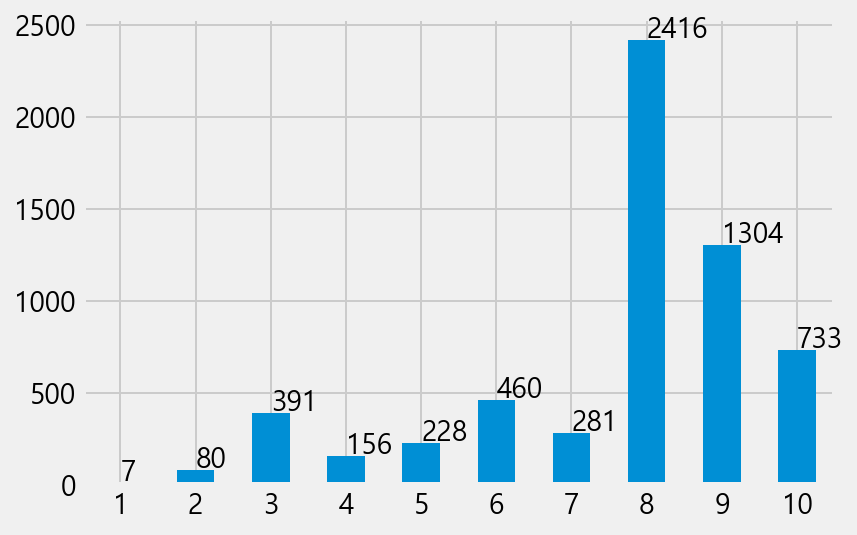

In [59]:
# 월별 확진자 수에 대한 빈도수를 구해서 시각화하기
month_case = data['월'].value_counts().sort_index()
month_case
bar_plot = month_case.plot.bar(rot=0)
for i in range(len(month_case)):
    bar_plot.text(x=i, y=month_case.iloc[i]+15, s=month_case.iloc[i])

In [60]:
data['확진일자'].value_counts()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
             ... 
2020-04-15      1
2020-01-24      1
2020-04-20      1
2020-02-02      1
2020-02-06      1
Name: 확진일자, Length: 253, dtype: int64

### 2. 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 

In [64]:
# 가장 마지막 행을 선택하기 (최초 확진일자)
first_day = data.iloc[-1, 7]
first_day

Timestamp('2020-01-24 00:00:00')

In [65]:
# 맨위에 있는 행을 선택 (가장 최근 확진일자)
last_day = data.iloc[0, 7]
last_day

Timestamp('2020-10-31 00:00:00')

In [68]:
# pd.date_range() 함수를 통해서 시작하는 날짜부터 끝나는 날짜까지
# DatetimeIndex 객체를 생성한다.
days = pd.date_range(first_day, last_day)
print(type(days))
days[:5]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [71]:
data['확진일자'].unique()

array(['2020-10-31T00:00:00.000000000', '2020-10-30T00:00:00.000000000',
       '2020-10-29T00:00:00.000000000', '2020-10-28T00:00:00.000000000',
       '2020-10-27T00:00:00.000000000', '2020-10-26T00:00:00.000000000',
       '2020-10-25T00:00:00.000000000', '2020-10-24T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2020-10-22T00:00:00.000000000',
       '2020-10-21T00:00:00.000000000', '2020-10-19T00:00:00.000000000',
       '2020-10-18T00:00:00.000000000', '2020-10-20T00:00:00.000000000',
       '2020-10-17T00:00:00.000000000', '2020-10-16T00:00:00.000000000',
       '2020-10-15T00:00:00.000000000', '2020-10-14T00:00:00.000000000',
       '2020-10-13T00:00:00.000000000', '2020-10-12T00:00:00.000000000',
       '2020-10-11T00:00:00.000000000', '2020-10-10T00:00:00.000000000',
       '2020-10-09T00:00:00.000000000', '2020-10-08T00:00:00.000000000',
       '2020-10-07T00:00:00.000000000', '2020-10-06T00:00:00.000000000',
       '2020-10-05T00:00:00.000000000', '2020-10-04

In [70]:
# DateTimeIndex 객체인 days를 DataFrame으로 생성하기
df_days = pd.DataFrame({'확진일자':days})
print(df_days.shape)
df_days.head()

(282, 1)


,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [72]:
# 확진일자별 빈도수 구하기
daily_case = data['확진일자'].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [75]:
# 확진일자별로 빈도수를 구한 Series 객체를 DataFrame으로 변환
df_daily_case = daily_case.to_frame()
print(df_daily_case.shape)
df_daily_case.head()

(253, 1)


,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [76]:
# 컬럼명 변경 확진일자 -> 확진자수
df_daily_case.columns = ['확진자수']
df_daily_case.head()

,확진자수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [77]:
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [79]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체일자와 확진일자 데이터를 merge() 로 합친다.
all_day = df_days.merge(df_daily_case, left_on='확진일자', right_on=df_daily_case.index, how='left')

print(all_day.shape)
print(all_day.head())

(282, 2)
        확진일자  확진자수
0 2020-01-24   1.0
1 2020-01-25   NaN
2 2020-01-26   NaN
3 2020-01-27   NaN
4 2020-01-28   NaN


In [81]:
# 확진자수의 결측치(outlier) 값은 0으로 채우고 값을 누적해서 더해준다.
# fillna() 함수는 결측치 값을 다른 값으로 채워줄 때 사용하는 함수
# 누적확진 컬럼을 추가하고 누적된 값을 할당한다.

all_day['누적확진'] = all_day['확진자수'].fillna(0).cumsum()
all_day.head()

,확진일자,확진자수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0


In [82]:
# 확진일자에서 연도는 제외하고 월-일로 '일자' 컬럼 만들기
all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [83]:
# 확진자수, 누적확진, 일자 컬럼을 선택해서 새로운 DataFrame을 생성하기
cum_day = all_day[['일자', '확진자수', '누적확진']]
# 일자 컬럼을 index로 설정한다.
cum_day = cum_day.set_index('일자')
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
10-27,31.0,5882.0
10-28,31.0,5913.0
10-29,52.0,5965.0


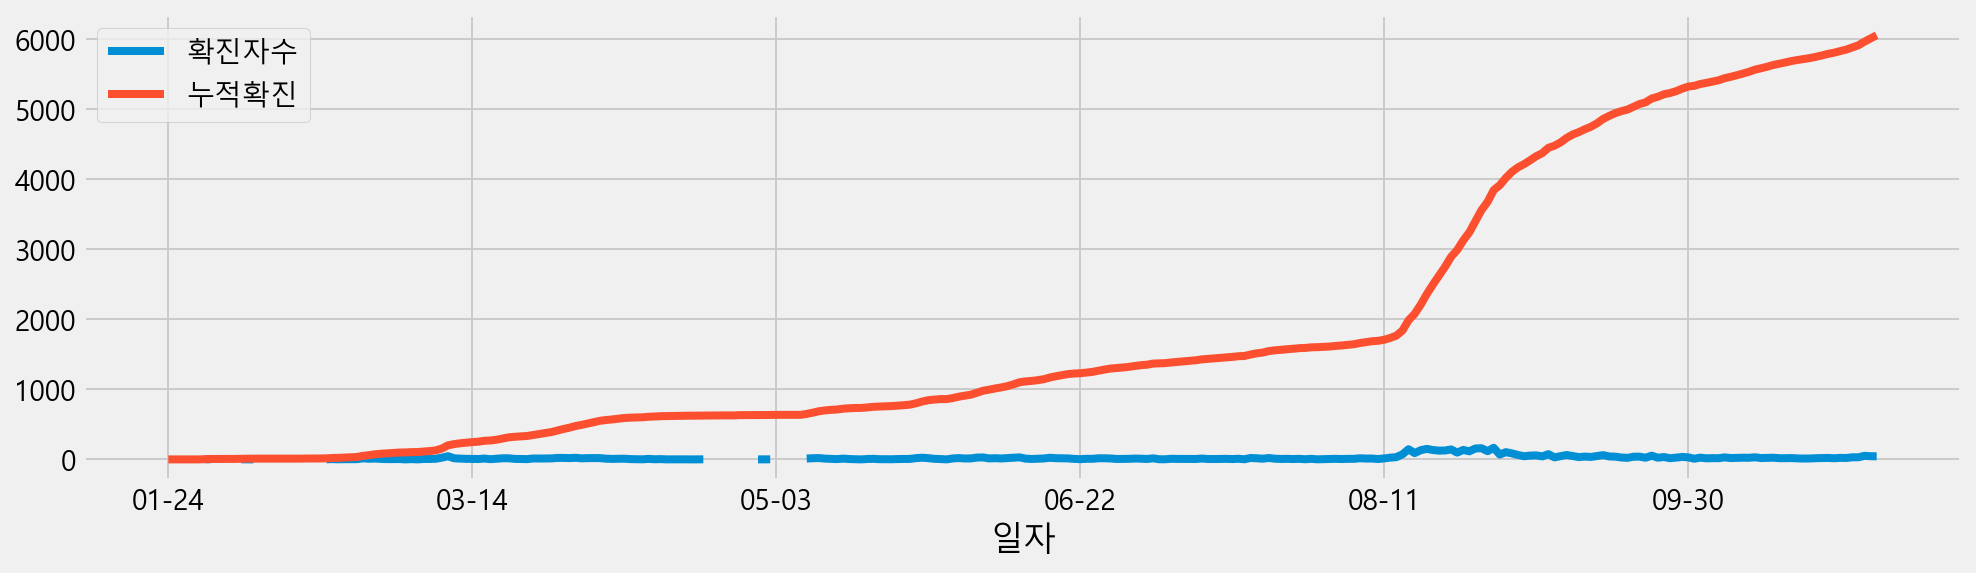

In [84]:
# DataFrame으로 확진자수와 누적확진을 line plot 그리기
cum_day.plot(figsize=(15, 4))

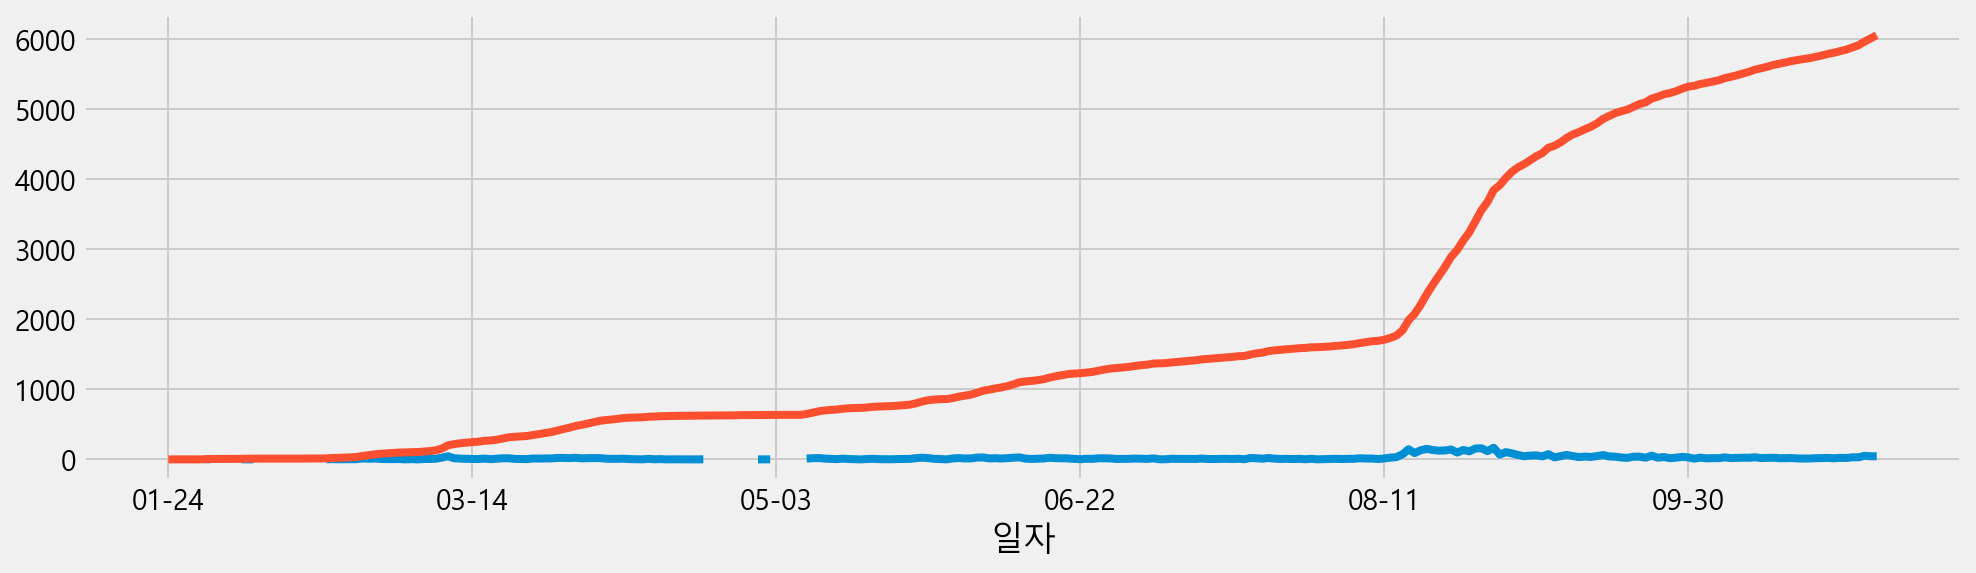

In [85]:
# Series 로 2개의 line plot을 그리기
cum_day['확진자수'].plot()
cum_day['누적확진'].plot(figsize=(15,4))

### 로그스케일
* 누적확진수와 확진자수의 차이가 너무 커서 그래프가 자세하게 보이지 않을 경우에
* 로그스케일로 표현을 하면 차이가 큰 값의 스케일을 조정해 준다.
* Numpy의 log() 함수를 사용한다.

In [86]:
import numpy as np

np.log(cum_day['누적확진'])

일자
01-24    0.000000
01-25    0.000000
01-26    0.000000
01-27    0.000000
01-28    0.000000
           ...   
10-27    8.679652
10-28    8.684909
10-29    8.693664
10-30    8.701346
10-31    8.708805
Name: 누적확진, Length: 282, dtype: float64

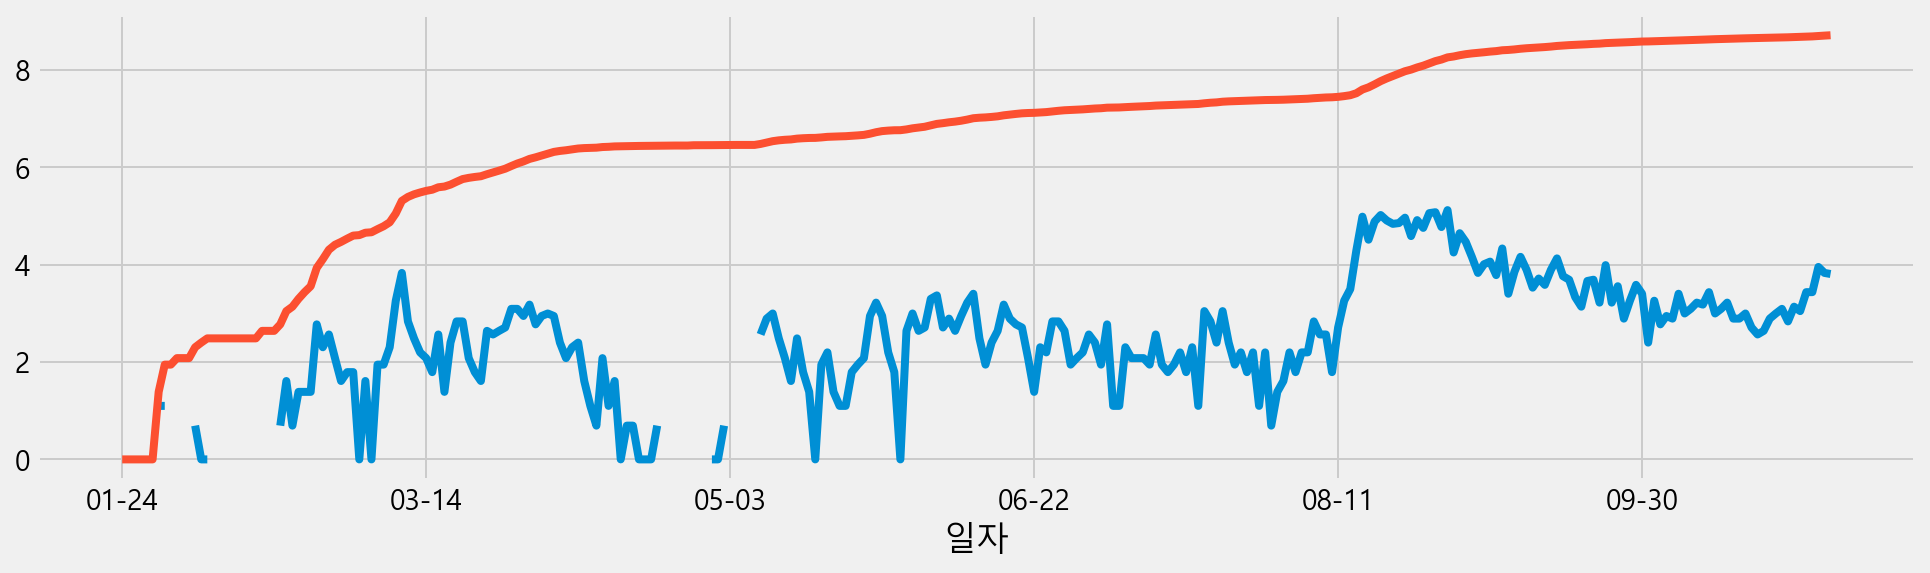

In [87]:
np.log(cum_day['확진자수']).plot()
np.log(cum_day['누적확진']).plot(figsize=(15,4))

In [88]:
all_day.head(1)

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24


In [90]:
# 확진월
all_day['확진월'] = all_day['확진일자'].dt.month
# 확진요일
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek
all_day.head(2)

,확진일자,확진자수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5


In [93]:
# 월별, 요일별 확진자수를 groupby 로 구하기
all_day_week = all_day.groupby(['확진월', '확진요일'])['확진자수'].sum()
all_day_week

확진월  확진요일
1    0         0.0
     1         0.0
     2         0.0
     3         3.0
     4         4.0
             ...  
10   2        94.0
     3       123.0
     4       137.0
     5       122.0
     6        88.0
Name: 확진자수, Length: 70, dtype: float64

In [99]:
# unstack() 은 인덱스를 컬럼으로 변경해주는 함수
# fillna(0) 는 결측치(NaN)을 0으로 채워주는 함수
# astype(int) 는 float 타입을 int 타입으로 변환해주는 함수
all_day_week = all_day_week.unstack().fillna(0).astype(int) # index에서 column으로 변경
all_day_week

확진월,1,2,3,4,5,6,7,8,9,10
확진요일,,,,,,,,,,
0,0,4,69,16,27,55,37,387,177,72
1,0,16,89,17,36,67,42,288,242,97
2,0,14,46,28,34,66,42,327,228,94
3,3,19,44,27,34,75,58,328,207,123
4,4,11,48,26,32,90,34,336,169,137
5,0,9,45,22,36,70,40,473,155,122
6,0,7,50,20,29,37,28,277,126,88


In [100]:
dayofweek = '월 화 수 목 금 토 일'
dayofweek = dayofweek.split()
print(type(dayofweek))
dayofweek

<class 'list'>


['월', '화', '수', '목', '금', '토', '일']

In [101]:
# style.background_gradient로 색상을 표현
all_day_week.style.background_gradient(cmap='Reds')

확진월,1,2,3,4,5,6,7,8,9,10
확진요일,,,,,,,,,,
0,0,4,69,16,27,55,37,387,177,72
1,0,16,89,17,36,67,42,288,242,97
2,0,14,46,28,34,66,42,327,228,94
3,3,19,44,27,34,75,58,328,207,123
4,4,11,48,26,32,90,34,336,169,137
5,0,9,45,22,36,70,40,473,155,122
6,0,7,50,20,29,37,28,277,126,88
